# 温度変化dfの前処理

## おまじないパート

In [1]:
import sys
from pathlib import Path

# 現在のノートブックのパスを取得
notebook_dir = Path().resolve() 

# プロジェクトルートディレクトリ（notebooksディレクトリの親ディレクトリ）を取得
# プロジェクトルートは2階層上です
project_root = notebook_dir.parent.parent

# プロジェクトルートをPythonの検索パスに追加
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
from groom import DataCleaner, save_to_parquet, load_from_parquet


In [3]:
self = DataCleaner()

In [4]:
import pandas as pd

## behaviorでのgroup分けより前必要な前処理

### 読み込み

In [5]:
raw_temperature_df = pd.read_csv(project_root / "data" / "t=0_1_1.csv")
print(raw_temperature_df.head())

     Date     time    name  id sex  facetemp nosetemp  facehigh  facelow  \
0  20-Apr  8:48:50  Takana  21   f      31.2     28.3      34.2     26.3   
1  20-Apr  8:49:00  Takana  21   f      31.8     28.4      34.6     26.5   
2  20-Apr  8:49:12  Takana  21   f      32.4     28.6      34.7     27.0   
3  20-Apr  8:49:25  Takana  21   f      32.4     28.4      35.6     27.0   
4  20-Apr  8:49:38  Takana  21   f      32.9     28.9      36.1     27.0   

  facehigh.1 facelow.1 behavior   to from shade luminocity  kin  t0_flag  
0        eye      nose       BL  NaN  NaN    no        240  NaN      1.0  
1        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  
2        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  
3        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  
4        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  


### 日時表記の整理

In [6]:
# --- 実行 ---
raw_temperature_df = self.process_datetime_columns(raw_temperature_df, year=2025)
print(raw_temperature_df.head())

             datetime    name  id sex  facetemp nosetemp  facehigh  facelow  \
0 2025-04-20 08:48:50  Takana  21   f      31.2     28.3      34.2     26.3   
1 2025-04-20 08:49:00  Takana  21   f      31.8     28.4      34.6     26.5   
2 2025-04-20 08:49:12  Takana  21   f      32.4     28.6      34.7     27.0   
3 2025-04-20 08:49:25  Takana  21   f      32.4     28.4      35.6     27.0   
4 2025-04-20 08:49:38  Takana  21   f      32.9     28.9      36.1     27.0   

  facehigh.1 facelow.1 behavior   to from shade luminocity  kin  t0_flag  
0        eye      nose       BL  NaN  NaN    no        240  NaN      1.0  
1        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  
2        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  
3        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  
4        eye      nose       BL  NaN  NaN    no        240  NaN      NaN  


### 不要な列の削除

- "facehigh"
- "facelow" 
- "facehigh.1" 
- "facelow.1" 
- "luminocity"

In [7]:
dropped_temperature_df = self.drop_unnecessary_columns(raw_temperature_df)
print(dropped_temperature_df.head())

             datetime    name  id sex  facetemp nosetemp behavior   to from  \
0 2025-04-20 08:48:50  Takana  21   f      31.2     28.3       BL  NaN  NaN   
1 2025-04-20 08:49:00  Takana  21   f      31.8     28.4       BL  NaN  NaN   
2 2025-04-20 08:49:12  Takana  21   f      32.4     28.6       BL  NaN  NaN   
3 2025-04-20 08:49:25  Takana  21   f      32.4     28.4       BL  NaN  NaN   
4 2025-04-20 08:49:38  Takana  21   f      32.9     28.9       BL  NaN  NaN   

  shade  kin  t0_flag  
0    no  NaN      1.0  
1    no  NaN      NaN  
2    no  NaN      NaN  
3    no  NaN      NaN  
4    no  NaN      NaN  


### sample_idの付与

記録単位の切り替わり判定
- 条件1: t0_flag が 1 である
- 条件2: 前の行から個体名 (name) が変わった
- 条件3: 前の行から10分 (600秒) 以上経過している

In [8]:
labeled_temperature_df = self.add_sampling_id(dropped_temperature_df)
print(labeled_temperature_df.head(10))

   sampling_id  t0_flag            datetime    name  id sex  facetemp  \
0            1      1.0 2025-04-20 08:48:50  Takana  21   f      31.2   
1            1      NaN 2025-04-20 08:49:00  Takana  21   f      31.8   
2            1      NaN 2025-04-20 08:49:12  Takana  21   f      32.4   
3            1      NaN 2025-04-20 08:49:25  Takana  21   f      32.4   
4            1      NaN 2025-04-20 08:49:38  Takana  21   f      32.9   
5            1      NaN 2025-04-20 08:49:52  Takana  21   f      33.8   
6            1      NaN 2025-04-20 08:50:53  Takana  21   f      32.0   
7            1      NaN 2025-04-20 08:51:03  Takana  21   f      31.2   
8            1      NaN 2025-04-20 08:51:37  Takana  21   f      30.7   
9            1      NaN 2025-04-20 08:51:47  Takana  21   f      30.4   

  nosetemp behavior   to from shade  kin  
0     28.3       BL  NaN  NaN    no  NaN  
1     28.4       BL  NaN  NaN    no  NaN  
2     28.6       BL  NaN  NaN    no  NaN  
3     28.4       BL  NaN

### behavior変化・Sgの有無フラグの付与

In [9]:
behavior_flagged_temperature_df = self.add_behavior_analysis_cols(labeled_temperature_df)

In [10]:
# 153行目から159行目（160行目3を含む）を表示
print(behavior_flagged_temperature_df.iloc[153:159])

     sampling_id  t0_flag            datetime   name  id sex  facetemp  \
153           13      NaN 2025-05-11 09:57:56  Kanna   1   f      34.5   
154           13      NaN 2025-05-11 09:58:04  Kanna   1   f      34.8   
155           13      NaN 2025-05-11 09:58:13  Kanna   1   f      34.6   
156           13      NaN 2025-05-11 09:59:28  Kanna   1   f      33.4   
157           13      NaN 2025-05-11 10:00:16  Kanna   1   f      35.1   
158           13      NaN 2025-05-11 10:00:24  Kanna   1   f      35.3   

    nosetemp behavior   to  from shade  kin  is_role_swapped  has_Sg  \
153     33.3  groomed  NaN  Kobu   yes   no            False    True   
154     33.7  groomed  NaN  Kobu   yes   no            False    True   
155       33  groomed  NaN  Kobu   yes   no            False    True   
156       32       Sg  NaN   NaN    no  NaN            False    True   
157       33       Sg  NaN   NaN    no  NaN            False    True   
158       33       Sg  NaN   NaN    no  NaN      

### session内で最初のbehaviorのものをフィルタリング

`groomer` -> `groomee`などの役割交代後のデータは解析のノイズになるので使わない

`is_initial_behavior`列はdrop

行数・列数をprint

In [11]:
print(behavior_flagged_temperature_df.shape)
initial_behavior_df = self.filter_initial_behavior_only(behavior_flagged_temperature_df)
print(initial_behavior_df.shape)

(3625, 16)
(3493, 15)


In [12]:
print(initial_behavior_df.head())

   sampling_id  t0_flag            datetime    name  id sex  facetemp  \
0            1      1.0 2025-04-20 08:48:50  Takana  21   f      31.2   
1            1      NaN 2025-04-20 08:49:00  Takana  21   f      31.8   
2            1      NaN 2025-04-20 08:49:12  Takana  21   f      32.4   
3            1      NaN 2025-04-20 08:49:25  Takana  21   f      32.4   
4            1      NaN 2025-04-20 08:49:38  Takana  21   f      32.9   

  nosetemp behavior   to from shade  kin  is_role_swapped  has_Sg  
0     28.3       BL  NaN  NaN    no  NaN            False   False  
1     28.4       BL  NaN  NaN    no  NaN            False   False  
2     28.6       BL  NaN  NaN    no  NaN            False   False  
3     28.4       BL  NaN  NaN    no  NaN            False   False  
4     28.9       BL  NaN  NaN    no  NaN            False   False  


### 温度変化・時間経過列を追加

In [13]:
delta_df = self.add_temperature_delta(initial_behavior_df)
print(delta_df.head())

   sampling_id  t0_flag            datetime  delta_time  delta_face  \
0            1      1.0 2025-04-20 08:48:50         0.0         0.0   
1            1      NaN 2025-04-20 08:49:00        10.0         0.6   
2            1      NaN 2025-04-20 08:49:12        22.0         1.2   
3            1      NaN 2025-04-20 08:49:25        35.0         1.2   
4            1      NaN 2025-04-20 08:49:38        48.0         1.7   

   delta_nose    name  id sex behavior   to from shade  kin  is_role_swapped  \
0         0.0  Takana  21   f       BL  NaN  NaN    no  NaN            False   
1         0.1  Takana  21   f       BL  NaN  NaN    no  NaN            False   
2         0.3  Takana  21   f       BL  NaN  NaN    no  NaN            False   
3         0.1  Takana  21   f       BL  NaN  NaN    no  NaN            False   
4         0.6  Takana  21   f       BL  NaN  NaN    no  NaN            False   

   has_Sg  
0   False  
1   False  
2   False  
3   False  
4   False  


### 初期行動が`dango`および`Sg`のsampleを除去

In [14]:
# 条件に合致する行を抽出
# ※ is_role_swappedがBool型（True/False）の場合は == False
# ※ もし文字列型（'False'）の場合は == 'False' としてください
# filtered_df = delta_df[(delta_df['is_role_swapped'] == False) & (delta_df['behavior'] == 'Sg')]
sg_filtered_df = delta_df[delta_df['behavior'] == 'Sg']

# 特定の列だけを選択して表示
# print(filtered_df[['datetime', 'sampling_id']])

# 行数も確認したい場合
print(f"\n該当件数: {len(sg_filtered_df)}件")


該当件数: 4件


In [15]:
# 条件に合致する行を抽出
# ※ is_role_swappedがBool型（True/False）の場合は == False
# ※ もし文字列型（'False'）の場合は == 'False' としてください
# filtered_df = delta_df[(delta_df['is_role_swapped'] == False) & (delta_df['behavior'] == 'Sg')]
dango_filtered_df = delta_df[delta_df['behavior'] == 'dango']

# 行数も確認したい場合
print(f"\n該当件数: {len(dango_filtered_df)}件")


該当件数: 449件


In [16]:
# 'dango' と 'Sg' を含まない（除外する）行だけを抽出
cleaned_delta_df = delta_df[~delta_df['behavior'].isin(['dango', 'Sg'])]

# 確認のためにユニークな値を出力
print("残ったbehavior:", cleaned_delta_df['behavior'].unique())

残ったbehavior: ['BL' 'grooming' 'groomed']


behaviorごとのsample数

In [17]:
self.print_sample_counts(cleaned_delta_df)

========== サンプル数集計 ==========
有効な総サンプル数: 284
------------------------------------
各behaviorごとのサンプル数:
  - BL: 53
  - groomed: 108
  - grooming: 123


## 温度変化散布図

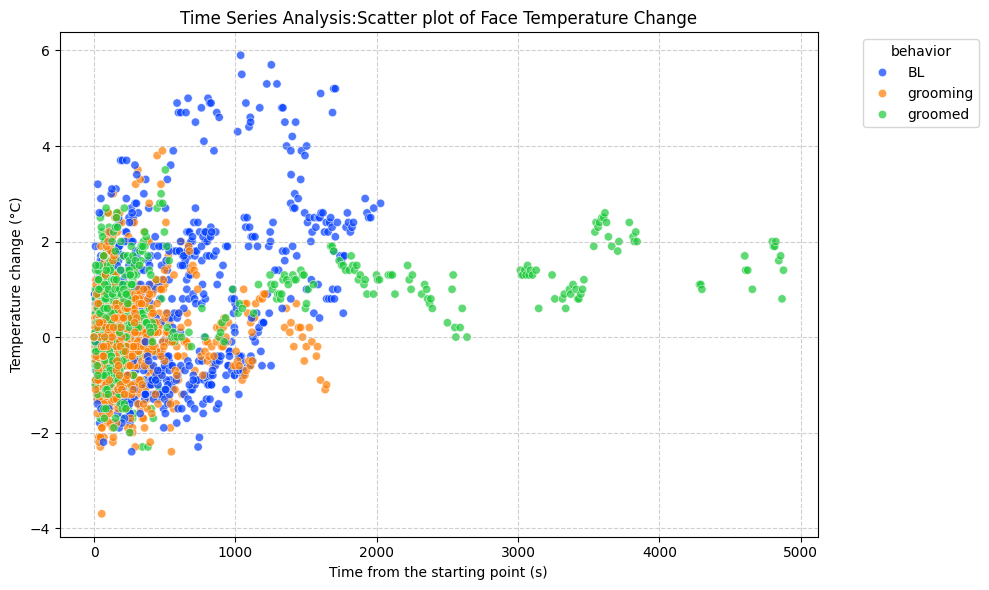

In [18]:
# 1. delta_face のプロット
self.plot_behavior_scatter(cleaned_delta_df, y_column='delta_face')

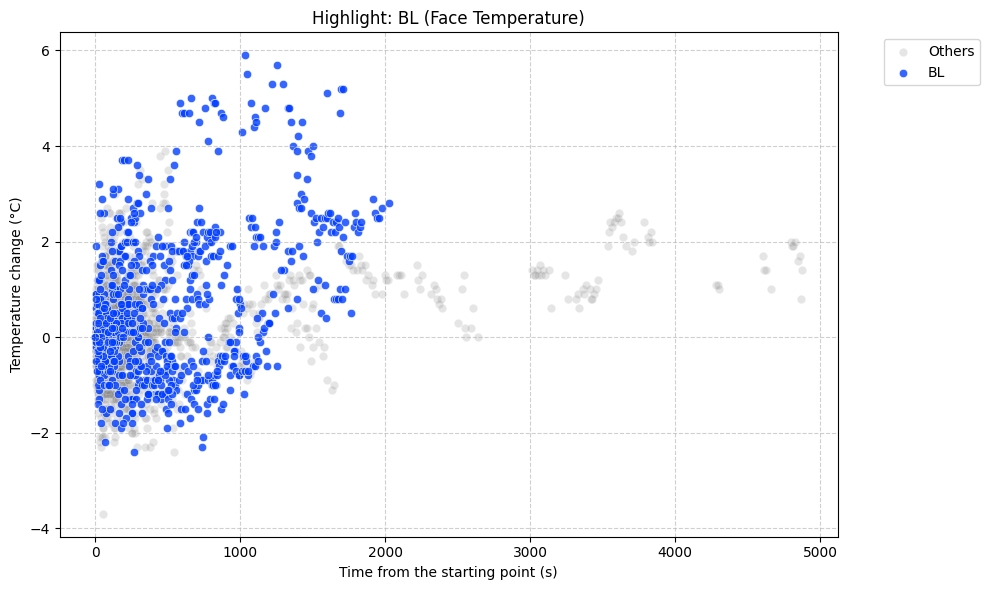

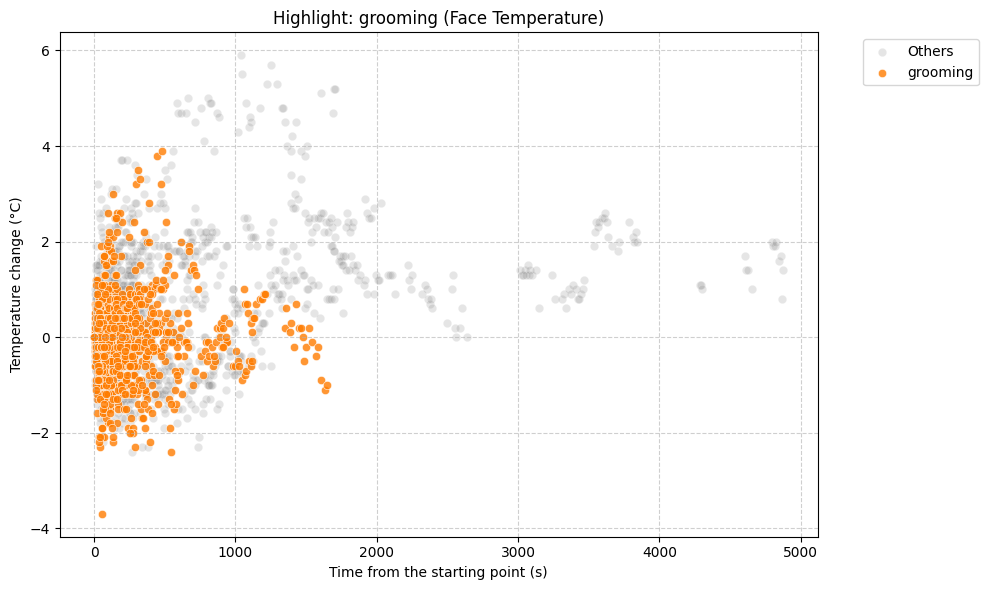

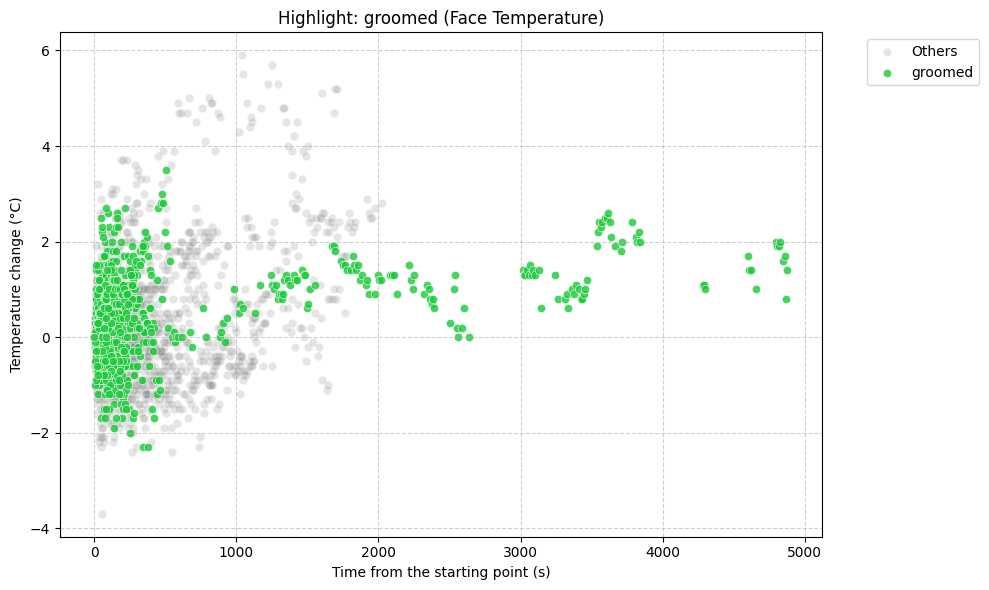

In [19]:
for behavior in cleaned_delta_df['behavior'].unique():
    self.plot_highlight_behavior(cleaned_delta_df, target_behavior=behavior, y_column='delta_face')

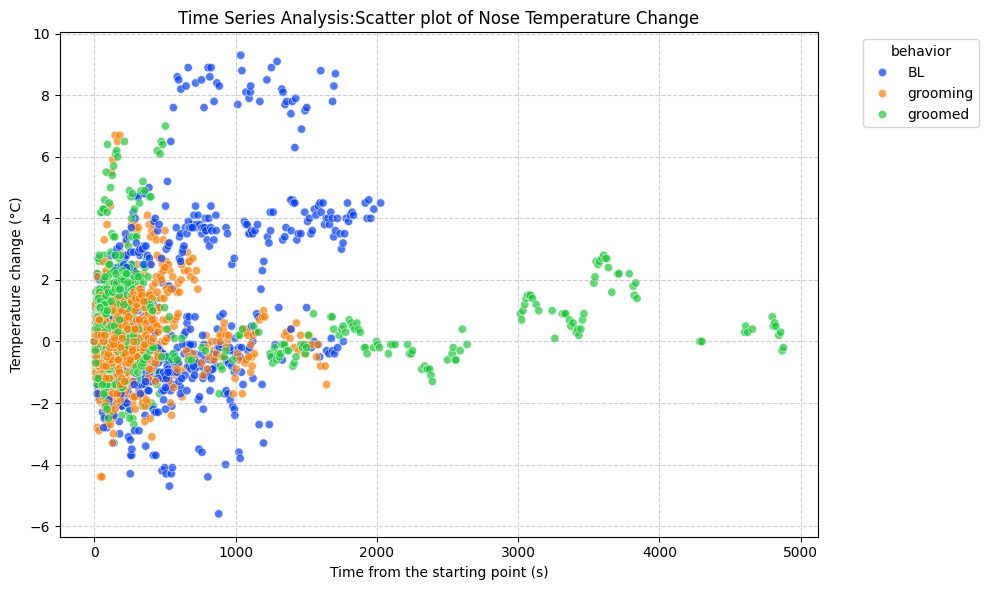

In [20]:
# 2. delta_nose のプロット
self.plot_behavior_scatter(cleaned_delta_df, y_column='delta_nose')

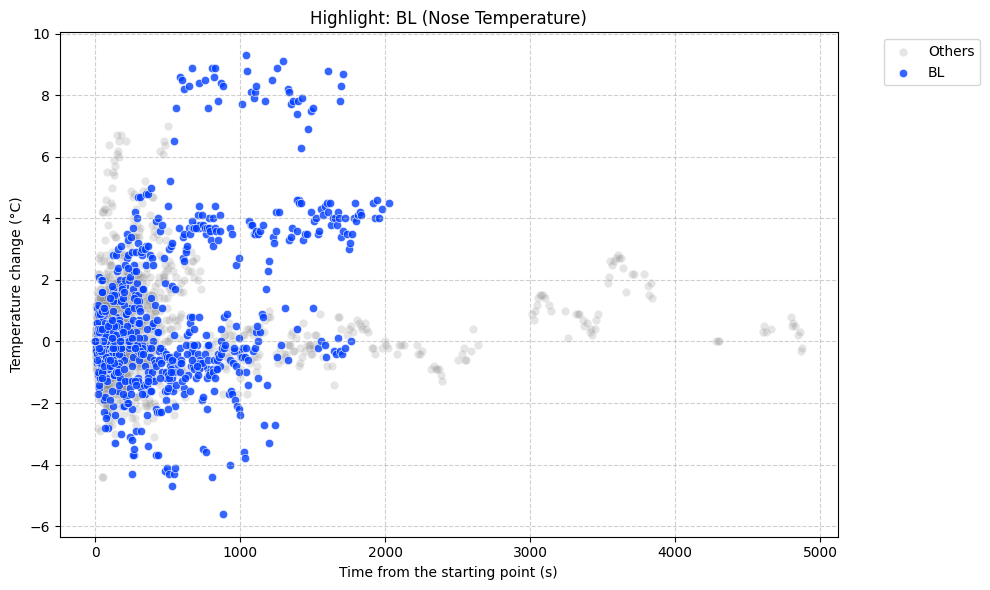

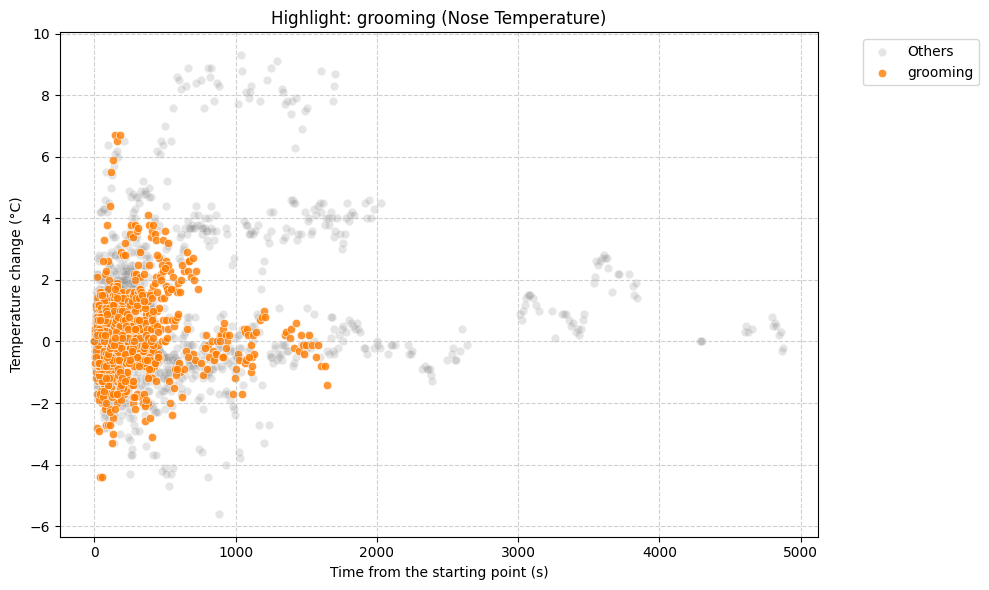

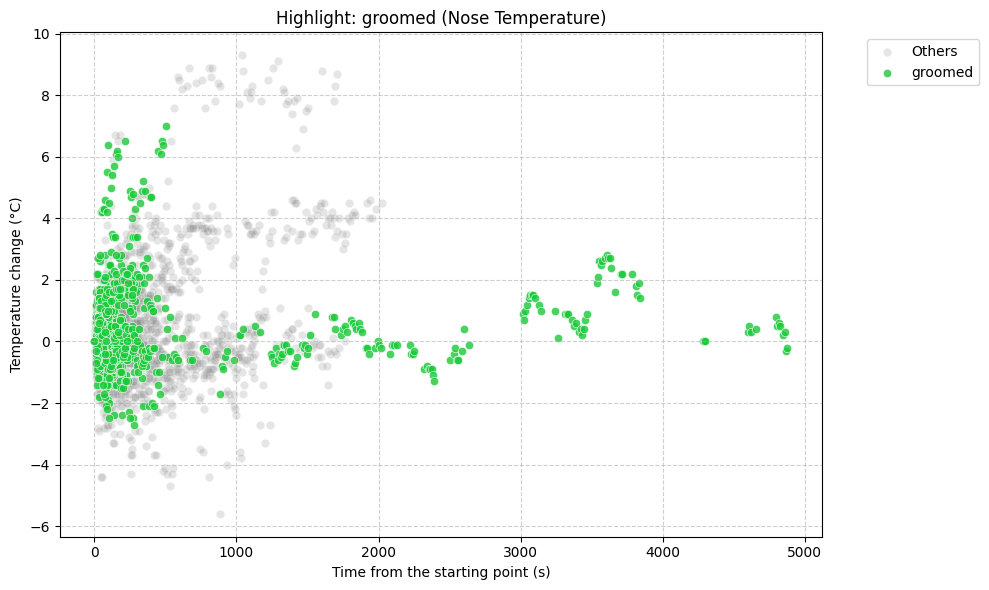

In [21]:
for behavior in cleaned_delta_df['behavior'].unique():
    self.plot_highlight_behavior(cleaned_delta_df, target_behavior=behavior, y_column='delta_nose')